<div style="display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:210%;
            letter-spacing:0.5px;
            padding:20px;
            color:white;
            border-style: solid;
            border-color: white;
            text-align:center;">
<b>
    Medical Chatbot / Virtual Assistant 📝

## <font color= maroon> **Purpose**:

The purpose of developing this virtual assitant is to leverage pre-processed and classified medical text data to create an intelligent system capable of providing specialized responses and assistance based on the medical specialty of the input text. <br><br>This system aims to enhance the accessibility of accurate and specialized medical information, support healthcare professionals in retrieeving relevant medical knowledge, and contribute to medical education training.

## <font color= maroon>**Use Cases:**

1. **Healthcare Professional Assistance**:<br> It can assist healthcare professionals in quickly acessing specialty-specific information, guilines, and best practices, thereby supporting clinical decision-making and enhancing patient care.<br><br>

2. **Medical Education and Training**: <br>The chatbot can serve as a valueble learning tool for medical students, residents, and the healthcare professionals by providing specialty-specific knowledge case studies, and educational materials.<br><br>

3. **Information Retrieval**: <br>It can facilitate the efficient retrieval of medical literature, research papers, and clinical trials specific to different medical specialties, aiding in evidence-based practice and research.<br><br>

<div style="font-family: 'Arial', sans-serif; line-height: 1.6;">
    <h2 style="color: maroon; text-align: center;">Contents</h2>
    <h4><a href="#1.0" style="text-decoration: underline;">1.0 Get the Datasets</a></h4>
<!--     <ul>
        <li><a href="#1.1" style="text-decoration: underline;">1.1 Import Functions/Load Dataset</a></li>
        <li><a href="#1.2" style="text-decoration: underline;">1.2 Tidy/Explore Dataset</a></li>
        <li><a href="#1.3" style="text-decoration: underline;">1.3 Count of each Medical Speciality</a></li>
        <li><a href="#1.4" style="text-decoration: underline;">1.4 Cleaning of Dataset</a></li>
        <li><a href="#1.5" style="text-decoration: underline;">1.5 Medical Specialty Word Count</a></li>
        <li><a href="#1.6" style="text-decoration: underline;">1.6 Text Complextiy/Readability</a></li>
    </ul> -->
    <h4><a href="#2.0" style="text-decoration: underline;">2.0 Exploration Data Analysis (EDA)</a></h4>
<!--     <ul>
        <li><a href="#2.1" style="text-decoration: underline;">2.1 Lower Case Text</a></li>
        <li><a href="#2.2" style="text-decoration: underline;">2.2 Remove Punctuation/Numbers</a></li>
        <li><a href="#2.3" style="text-decoration: underline;">2.3 Tokenization</a></li>
        <li><a href="#2.4" style="text-decoration: underline;">2.4 Remove Stopwords</a></li>
        <li><a href="#2.5" style="text-decoration: underline;">2.5 Lemmatization</a></li>
        <li><a href="#2.6" style="text-decoration: underline;">2.6 Word Difference</a></li>
    </ul> -->
    <h4><a href="#3.0" style="text-decoration: underline;">3.0 General Cleaning</a></h4>
    <ul>
        <li><a href="#3.1" style="text-decoration: underline;">3.1 Feature Extraction</a></li>
        <li><a href="#3.2" style="text-decoration: underline;">3.2 Remove Missing Values</a></li>
    </ul>
    <h4><a href="#4.0" style="text-decoration: underline;">4.0 Deal with Imbalance Data</a></h4>
    <ul>
        <li><a href="#4.1" style="text-decoration: underline;">4.1 Downsampling</a></li>
        <li><a href="#4.2" style="text-decoration: underline;">4.2 Data Augmentation</a></li>
<!--         <li><a href="#4.3" style="text-decoration: underline;">4.3 Algorithm Selection/Evaluation</a></li>
        <li><a href="#4.4" style="text-decoration: underline;">4.4 Model Fine-Tuning/Validation</a></li>
        <li><a href="#4.5" style="text-decoration: underline;">4.5 Actual vs Predicted</a></li> -->
    </ul>
    <h4><a href="#5.0" style="text-decoration: underline;">5.0 Text Normalisation</a></h4>
    <ul>
        <li><a href="#5.1" style="text-decoration: underline;">5.1 Lower Case</a></li>
        <li><a href="#5.2" style="text-decoration: underline;">5.2 Remove Punctuations and Numbers</a></li>
        <li><a href="#5.3" style="text-decoration: underline;">5.3 Removing Stop Words</a></li>
        <li><a href="#5.4" style="text-decoration: underline;">5.4 Tokenise</a></li>
        <li><a href="#5.5" style="text-decoration: underline;">5.5 Lemmatize</a></li>
        <li><a href="#565" style="text-decoration: underline;">5.6 All-in-One</a></li>
    </ul>
    <h4><a href="#6.0" style="text-decoration: underline;">6.0 Train Test Spilt</a></h4>
    <h4><a href="#7.0" style="text-decoration: underline;">7.0 text Representation</a></h4>
    <ul>
        <li><a href="#7.1" style="text-decoration: underline;">7.1 Feature Extraction</a></li>
        <li><a href="#7.2" style="text-decoration: underline;">7.2 Remove Missing Values</a></li>
    </ul>
</div>

## <font color= grey>Get the Datasets<a class="anchor" id="1.0"></a>

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import textstat

import matplotlib
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import scipy.sparse as sp
import spacy


from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# from google.colab.data_table import DataTable
from sklearn.model_selection import GridSearchCV 
import lightgbm as lgb
from sklearn.model_selection import learning_curve
from lightgbm.plotting import plot_learning_curve
from sklearn.metrics import precision_recall_fscore_support

In [91]:
# Read n-gram (1, 1) output
X_unigrams_train = pd.read_csv('X_unigrams_train.csv')
X_unigrams_val = pd.read_csv('X_unigrams_val.csv')
X_unigrams_test = pd.read_csv('X_unigrams_test.csv')

y_unigrams_train = pd.read_csv('y_unigrams_train.csv')
y_unigrams_val = pd.read_csv('y_unigrams_val.csv')
y_unigrams_test = pd.read_csv('y_unigrams_test.csv')

# Read n-gram (1, 2) output

# Define the chunk size
chunk_size = 10000  # Adjust the chunk size as per your system's memory capacity

# Initialize an empty list to store the chunks
chunks = []

# Read the file in chunks
for chunk in pd.read_csv('X_uni_bigrams_train.csv', chunksize=chunk_size):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
X_uni_bigrams_train = pd.concat(chunks, ignore_index=True)

# X_uni_bigrams_train = pd.read_csv('X_uni_bigrams_train.csv')
X_uni_bigrams_val = pd.read_csv('X_uni_bigrams_val.csv')
X_uni_bigrams_test = pd.read_csv('X_uni_bigrams_test.csv')

y_uni_bigrams_train = pd.read_csv('y_uni_bigrams_train.csv')
y_uni_bigrams_val = pd.read_csv('y_uni_bigrams_val.csv')
y_uni_bigrams_test = pd.read_csv('y_uni_bigrams_test.csv')

# Read TF-IDF output
X_tfidf_train = pd.read_csv('X_tfidf_train.csv')
X_tfidf_val = pd.read_csv('X_tfidf_val.csv')
X_tfidf_test = pd.read_csv('X_tfidf_test.csv')

y_tfidf_train = pd.read_csv('y_tfidf_train.csv')
y_tfidf_val = pd.read_csv('y_tfidf_val.csv')
y_tfidf_test = pd.read_csv('y_tfidf_test.csv')

MemoryError: 

## <font color= grey>Test Classifier Algorithmn<a class="anchor" id="2.0"></a>

There are multiple text classifier algorithmn used for NLP. However, the most common one includes:
1. Naive Bayes
2. Support Vector Machine (SVM)
3. Logistic Regression
4. Random Forest
5. Decision Tree

>**1. Naive Bayes**

In [ ]:
# Function to train and evaluate Naive Bayes
def train_and_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Naive Bayes model
    model = MultinomialNB()

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred, zero_division=1))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred, zero_division=1))

    # Plot learning curve
    plot_nb_learning_curve(model, X_train, y_train, text_representation)

def plot_nb_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Naive Bayes Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Train and evaluate Naive Bayes with Unigrams (1, 1)
train_and_evaluate_nb(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Naive Bayes with n-gram (1, 2)
train_and_evaluate_nb(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Naive Bayes with TfidfVectorizer
train_and_evaluate_nb(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")


In [51]:
# def train_and_evaluate_nb(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
#     # Initialize Naive Bayes model
#     model = MultinomialNB()

#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions on validation set
#     y_val_pred = model.predict(X_val)

#     # Print classification report for validation set
#     print(f"Classification Report for {text_representation} (Validation Set):")
#     print(classification_report(y_val, y_val_pred))

#     # Predictions on test set
#     y_test_pred = model.predict(X_test)

#     # Print classification report for test set
#     print(f"Classification Report for {text_representation} (Test Set):")
#     print(classification_report(y_test, y_test_pred))

# # Example usage for Naive Bayes
# train_and_evaluate_nb(X_count_train, y_train, X_count_val, y_val, X_count_test, y_test, "Count Vectorization")
# train_and_evaluate_nb(X_grams_train, y_train, X_grams_val, y_val, X_grams_test, y_test, "N-grams")
# train_and_evaluate_nb(X_tfidf_train, y_train, X_tfidf_val, y_val, X_tfidf_test, y_test, "TF-IDF")

>**2. Support Vector Machine (SVM)**

In [ ]:
# Function to train and evaluate SVM
def train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize SVM model
    model = SVC(class_weight='balanced')

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_svm_learning_curve(model, X_train, y_train, text_representation)

def plot_svm_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'SVM Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for SVM
# Train and evaluate SVM with Unigrams (1, 1)
train_and_evaluate_svm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate SVM with n-gram (1, 2)
train_and_evaluate_svm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate SVM with TfidfVectorizer
train_and_evaluate_svm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

In [53]:
# def train_and_evaluate_svm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
#     # Initialize SVM model
#     model = SVC(class_weight='balanced')

#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions on validation set
#     y_val_pred = model.predict(X_val)

#     # Print classification report for validation set
#     print(f"Classification Report for {text_representation} (Validation Set):")
#     print(classification_report(y_val, y_val_pred))

#     # Predictions on test set
#     y_test_pred = model.predict(X_test)

#     # Print classification report for test set
#     print(f"Classification Report for {text_representation} (Test Set):")
#     print(classification_report(y_test, y_test_pred))

# # Example usage for SVM
# train_and_evaluate_svm(X_count_train, y_train, X_count_val, y_val, X_count_test, y_test, "Count Vectorization")
# train_and_evaluate_svm(X_grams_train, y_train, X_grams_val, y_val, X_grams_test, y_test, "N-grams")
# train_and_evaluate_svm(X_tfidf_train, y_train, X_tfidf_val, y_val, X_tfidf_test, y_test, "TF-IDF")

>**3. Logistic Regression**

In [ ]:
# Function to train and evaluate Logistic Regression
def train_and_evaluate_logistic_regression(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Logistic Regression model
    model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_logistic_regression_learning_curve(model, X_train, y_train, text_representation)

def plot_logistic_regression_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Logistic Regression Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for Logistic Regression
# Train and evaluate Logistic Regression with Unigrams (1, 1)
train_and_evaluate_logistic_regression(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Logistic Regression with n-gram (1, 2)
train_and_evaluate_logistic_regression(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Logistic Regression with TfidfVectorizer
train_and_evaluate_logistic_regression(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

In [55]:
# # Function to fit and evaluate logistic regression
# def train_and_evaluate_lr(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
#     # Initialize logistic regression model
#     model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, n_jobs=-1)
#     # Train the model
#     model.fit(X_train, y_train)
#     # Predictions on validation set
#     y_val_pred = model.predict(X_val)
#     # Print classification report for validation set
#     print(f"Classification Report for {text_representation} (Validation Set):")
#     print(classification_report(y_val, y_val_pred))

#     # Predictions on test set
#     y_test_pred = model.predict(X_test)

#     # Print classification report for test set
#     print(f"Classification Report for {text_representation} (Test Set):")
#     print(classification_report(y_test, y_test_pred))

# # Example usage
# train_and_evaluate_lr(X_count_train, y_train, X_count_val, y_val, X_count_test, y_test, "Count Vectorization")
# train_and_evaluate_lr(X_grams_train, y_train, X_grams_val, y_val, X_grams_test, y_test, "N-grams")
# train_and_evaluate_lr(X_tfidf_train, y_train, X_tfidf_val, y_val, X_tfidf_test, y_test, "TF-IDF")


>**4. Random Forest**

In [ ]:
# Function to train and evaluate Random Forest
def train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_random_forest_learning_curve(model, X_train, y_train, text_representation)

def plot_random_forest_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Random Forest Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for Random Forest
# Train and evaluate Random Forest with Unigrams (1, 1)
train_and_evaluate_random_forest(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Random Forest with n-gram (1, 2)
train_and_evaluate_random_forest(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Random Forest with TfidfVectorizer
train_and_evaluate_random_forest(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

In [57]:
# def train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
#     # Initialize Random Forest model with n_jobs=-1
#     model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # You can adjust the number of estimators

#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions on validation set
#     y_val_pred = model.predict(X_val)

#     # Print classification report for validation set
#     print(f"Classification Report for {text_representation} (Validation Set):")
#     print(classification_report(y_val, y_val_pred))

#     # Predictions on test set
#     y_test_pred = model.predict(X_test)

#     # Print classification report for test set
#     print(f"Classification Report for {text_representation} (Test Set):")
#     print(classification_report(y_test, y_test_pred))

# # Example usage for Random Forest with n_jobs=-1
# train_and_evaluate_rf(X_count_train, y_train, X_count_val, y_val, X_count_test, y_test, "Count Vectorization")
# train_and_evaluate_rf(X_grams_train, y_train, X_grams_val, y_val, X_grams_test, y_test, "N-grams")
# train_and_evaluate_rf(X_tfidf_train, y_train, X_tfidf_val, y_val, X_tfidf_test, y_test, "TF-IDF")

>**5. Decision Tree**

In [ ]:
# Function to train and evaluate Decision Tree
def train_and_evaluate_decision_tree(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize Decision Tree model
    model = DecisionTreeClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_decision_tree_learning_curve(model, X_train, y_train, text_representation)

def plot_decision_tree_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'Decision Tree Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for Decision Tree
# Train and evaluate Decision Tree with Unigrams (1, 1)
train_and_evaluate_decision_tree(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate Decision Tree with n-gram (1, 2)
train_and_evaluate_decision_tree(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate Decision Tree with TfidfVectorizer
train_and_evaluate_decision_tree(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

In [59]:
# def train_and_evaluate_dt(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
#     # Initialize Decision Tree model
#     model = DecisionTreeClassifier(random_state=42)

#     # Train the model
#     model.fit(X_train, y_train)

#     # Predictions on validation set
#     y_val_pred = model.predict(X_val)

#     # Print classification report for validation set
#     print(f"Classification Report for {text_representation} (Validation Set):")
#     print(classification_report(y_val, y_val_pred))

#     # Predictions on test set
#     y_test_pred = model.predict(X_test)

#     # Print classification report for test set
#     print(f"Classification Report for {text_representation} (Test Set):")
#     print(classification_report(y_test, y_test_pred))

# # Example usage for Decision Tree
# train_and_evaluate_dt(X_count_train, y_train, X_count_val, y_val, X_count_test, y_test, "Count Vectorization")
# train_and_evaluate_dt(X_grams_train, y_train, X_grams_val, y_val, X_grams_test, y_test, "N-grams")
# train_and_evaluate_dt(X_tfidf_train, y_train, X_tfidf_val, y_val, X_tfidf_test, y_test, "TF-IDF")

>**6. LightGBM**

In [ ]:
# Function to train and evaluate LightGBM
def train_and_evaluate_lightgbm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Initialize LightGBM model
    model = lgb.LGBMClassifier(random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred = model.predict(X_val)

    # Print classification report for validation set
    print(f"Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = model.predict(X_test)

    # Print classification report for test set
    print(f"Classification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot learning curve
    plot_lightgbm_learning_curve(model, X_train, y_train, text_representation)

def plot_lightgbm_learning_curve(estimator, X, y, text_representation):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='f1_micro', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
    plt.title(f'LightGBM Learning Curve ({text_representation})')
    plt.xlabel('Training Examples')
    plt.ylabel('F1 Score (micro)')
    plt.legend()
    plt.show()

# Example usage for LightGBM
# Train and evaluate LightGBM with Unigrams (1, 1)
train_and_evaluate_lightgbm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")

# Train and evaluate LightGBM with n-gram (1, 2)
train_and_evaluate_lightgbm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")

# Train and evaluate LightGBM with TfidfVectorizer
train_and_evaluate_lightgbm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")

Here is an overview of the result for easy viewing

|  | Unigrams | Uni-Bigrams | TF-IDF |
| ---------|----------|----------|---------|
| Naives Bayes (VAL) | 0.75 | 0.78 | 0.76 |
| Naives Bayes (TEST) | 0.74 | 0.77 | 0.75 |
| ---------|----------|----------|---------|
| SVM (VAL) | 0.76 | 0.76 | 0.79 |
| SVM (TEST) | 0.77 | 0.76 | 0.79 |
| ---------|----------|----------|---------|
| Logistic Regression (VAL) | 0.75 | 0.76 | 0.80 |
| Logistic Regression (TEST)| 0.76 | 076 | 0.79 |
| ---------|----------|----------|---------|
| Decision Tree (VAL) | 0.76 | 0.77 | 0.76 |
| Decision Tree (TEST)| 0.78| 0.79 | 0.78 |
| ---------|----------|----------|---------|
| LightGBM (VAL) | 0.77 | 0.77 | 0.70 |
| LightGBM (TEST)| 0.79 | 0.79 | 0.69 |

## <font color= grey>Hyper-parameter Tuning

In [ ]:
# # Define the objective function for the optimizationdef objective(trial):
# # Parameters to be tuned by Optuna    
# max_df = trial.suggest_categorical('vect__max_df', [0.5, 0.75, 1.0])
# ngram_range = trial.suggest_categorical('vect__ngram_range', [(1, 1), (1, 2)])    
# C = trial.suggest_loguniform('clf__C', 0.01, 10)
# solver = trial.suggest_categorical('clf__solver', ['lbfgs', 'saga'])    
# class_weight = trial.suggest_categorical('clf__class_weight', [None, 'balanced'])

# # Creating a pipeline with CountVectorizer and Logistic Regression
# pipeline = Pipeline([        
#     ('vect', CountVectorizer(max_df=max_df, ngram_range=ngram_range)),
#     ('clf', LogisticRegression(C=C, solver=solver, class_weight=class_weight, max_iter=1000))    ])
# # Evaluation with cross-validation
# scores = cross_val_score(pipeline, X_train, y_train, n_jobs=-1, cv=5, scoring='accuracy')    
# return np.mean(scores)

# # Create an Optuna study object
# study = optuna.create_study(direction='maximize')study.optimize(objective, n_trials=100)
# # Best parameters found
# print("Best parameters set:")print(study.best_params)
# # Evaluate the best model on the test set
# best_pipeline = Pipeline([    
#     ('vect', CountVectorizer(max_df=study.best_params['vect__max_df'], ngram_range=study.best_params['vect__ngram_range'])),
#     ('clf', LogisticRegression(C=study.best_params['clf__C'], 
#                                solver=study.best_params['clf__solver'], 
#                                class_weight=study.best_params['clf__class_weight'], max_iter=1000))])

# best_pipeline.fit(X_train, y_train)y_pred = best_pipeline.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)print("\nTest set accuracy: {:.2f}".format(test_accuracy))

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import optuna
from optuna.visualization import plot_optimization_history

def objective(trial, X_train, y_train, X_val, y_val):
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # You can set a default value or omit this line if you prefer
    
    model = SVC(C=C, kernel=kernel, degree=degree)
    
    # Train and evaluate the model with cross-validation
    scores = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='accuracy')
    return scores.mean()

# Loop through your datasets and optimize parameters for each
datasets = [
    (X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, "Unigrams"),
    (X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, "Uni-Bigrams"),
    (X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, "TF-IDF")
]

for X_train, y_train, X_val, y_val, text_representation in datasets:
    # Create an Optuna study object
    study = optuna.create_study(direction='maximize')
    
    # Define the objective function with the current dataset
    objective_func = lambda trial: objective(trial, X_train, y_train, X_val, y_val)
    
    # Optimize hyperparameters
    study.optimize(objective_func, n_trials=100)
    
    # Get the best hyperparameters
    best_params = study.best_params
    
    # Print the best hyperparameters and dataset
    print(f"Best Hyperparameters for {text_representation}:")
    print(best_params)
    
    # Create and train the final SVM model with the best hyperparameters
    if best_params['kernel'] == 'poly':
        final_model = SVC(C=best_params['C'], kernel=best_params['kernel'], degree=best_params['degree'])
    else:
        final_model = SVC(C=best_params['C'], kernel=best_params['kernel'])
    final_model.fit(X_train, y_train)
    
    # Predictions on validation set
    y_val_pred = final_model.predict(X_val)
    
    # Print the final classification report for the validation set
    print(f"Final Classification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))
    
    # Plot the optimization history
    plot_optimization_history(study)


[I 2023-12-14 04:22:54,250] A new study created in memory with name: no-name-8b236ed7-be95-41df-9580-2ddee5aba175
[I 2023-12-14 04:23:00,684] Trial 0 finished with value: 0.7477995341783122 and parameters: {'C': 2.5816917020247137, 'kernel': 'linear'}. Best is trial 0 with value: 0.7477995341783122.
[I 2023-12-14 04:23:28,691] Trial 1 finished with value: 0.7345371574043982 and parameters: {'C': 0.2710209048432665, 'kernel': 'rbf'}. Best is trial 0 with value: 0.7477995341783122.
[I 2023-12-14 04:23:38,672] Trial 2 finished with value: 0.7463269147437981 and parameters: {'C': 14.788120766911891, 'kernel': 'linear'}. Best is trial 0 with value: 0.7477995341783122.
[I 2023-12-14 04:24:14,930] Trial 3 finished with value: 0.2882989383598743 and parameters: {'C': 0.002179810569193329, 'kernel': 'poly', 'degree': 4}. Best is trial 0 with value: 0.7477995341783122.
[I 2023-12-14 04:24:33,190] Trial 4 finished with value: 0.6686288051132054 and parameters: {'C': 11.723831384551127, 'kernel': 

[I 2023-12-14 04:38:35,873] Trial 43 finished with value: 0.7757745639692342 and parameters: {'C': 1.0854755039261044, 'kernel': 'rbf'}. Best is trial 42 with value: 0.7761408568952443.
[I 2023-12-14 04:38:56,011] Trial 44 finished with value: 0.7706166720831978 and parameters: {'C': 0.5080169520089158, 'kernel': 'rbf'}. Best is trial 42 with value: 0.7761408568952443.
[I 2023-12-14 04:39:11,543] Trial 45 finished with value: 0.76841214386307 and parameters: {'C': 8.42116146793297, 'kernel': 'rbf'}. Best is trial 42 with value: 0.7761408568952443.
[I 2023-12-14 04:39:44,025] Trial 46 finished with value: 0.25147261943451416 and parameters: {'C': 0.00011697667521455815, 'kernel': 'poly', 'degree': 4}. Best is trial 42 with value: 0.7761408568952443.
[I 2023-12-14 04:40:20,323] Trial 47 finished with value: 0.6078790217744556 and parameters: {'C': 0.061601121258599435, 'kernel': 'rbf'}. Best is trial 42 with value: 0.7761408568952443.
[I 2023-12-14 04:40:38,344] Trial 48 finished with va

[I 2023-12-14 04:53:08,389] Trial 87 finished with value: 0.661265030874228 and parameters: {'C': 0.1133021235423205, 'kernel': 'rbf'}. Best is trial 53 with value: 0.7768775051457047.
[I 2023-12-14 04:53:26,275] Trial 88 finished with value: 0.776143565160871 and parameters: {'C': 1.0175547153943072, 'kernel': 'rbf'}. Best is trial 53 with value: 0.7768775051457047.
[I 2023-12-14 04:53:45,252] Trial 89 finished with value: 0.7739342974758965 and parameters: {'C': 1.0565211701316377, 'kernel': 'rbf'}. Best is trial 53 with value: 0.7768775051457047.
[I 2023-12-14 04:54:11,248] Trial 90 finished with value: 0.5228300021666125 and parameters: {'C': 0.2988201053810562, 'kernel': 'poly', 'degree': 3}. Best is trial 53 with value: 0.7768775051457047.
[I 2023-12-14 04:54:27,850] Trial 91 finished with value: 0.7746675603943235 and parameters: {'C': 2.786909683715297, 'kernel': 'rbf'}. Best is trial 53 with value: 0.7768775051457047.
[I 2023-12-14 04:54:45,344] Trial 92 finished with value: 0

Best Hyperparameters for Unigrams:
{'C': 1.7438628748434657, 'kernel': 'rbf'}
Final Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.81      0.78       226
 Consult - History and Phy.       0.86      0.87      0.87       226
                 Orthopedic       0.79      0.87      0.83       226
                    Surgery       0.79      0.63      0.70       226

                   accuracy                           0.80       904
                  macro avg       0.80      0.80      0.79       904
               weighted avg       0.80      0.80      0.79       904



ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [76]:
import plotly

Best Parameters for Count Vectorization:  {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Best F1 Score for Count Vectorization:  0.774043361234332

Classification Report for Count Vectorization (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.77      0.76       226
 Consult - History and Phy.       0.83      0.90      0.86       226
                 Orthopedic       0.79      0.87      0.83       226
                    Surgery       0.78      0.63      0.70       226

                   accuracy                           0.79       904
                  macro avg       0.79      0.79      0.79       904
               weighted avg       0.79      0.79      0.79       904


Classification Report for Count Vectorization (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.77      0.76       222
 Consult - History and Phy.       0.83     

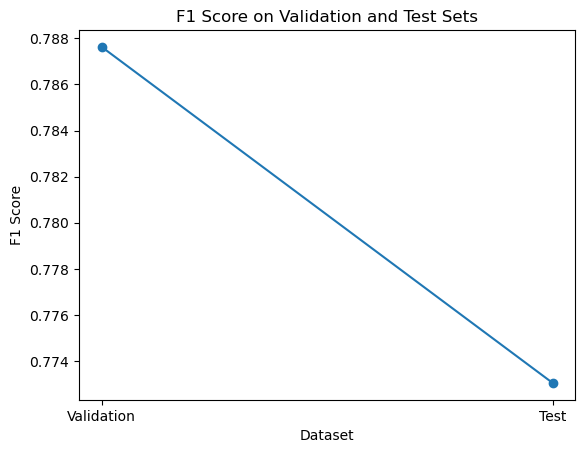

KeyboardInterrupt: 

In [83]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

def grid_search_svm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Define the parameter grid for SVM
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4, 5],
    }

    # Initialize SVM model
    model = SVC(class_weight='balanced', random_state=42)

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

    # Perform grid search on the training set
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best Parameters for {text_representation}: ", grid_search.best_params_)
    print(f"Best F1 Score for {text_representation}: ", grid_search.best_score_)

    # Predictions on validation set
    y_val_pred = grid_search.predict(X_val)

    # Print classification report for validation set
    print(f"\nClassification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = grid_search.predict(X_test)

    # Print classification report for test set
    print(f"\nClassification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot the results on validation and test sets
    accuracy_val = grid_search.score(X_val, y_val)
    accuracy_test = grid_search.score(X_test, y_test)
    
    plt.plot(['Validation', 'Test'], [accuracy_val, accuracy_test], marker='o')
    plt.title('F1 Score on Validation and Test Sets')
    plt.xlabel('Dataset')
    plt.ylabel('F1 Score')
    plt.show()

# Perform grid search for each vectorized dataset
grid_search_svm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")
grid_search_svm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")
grid_search_svm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")


Best Parameters for Unigrams:  {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Best F1 Score for Unigrams:  0.774043361234332

Classification Report for Unigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.76      0.77      0.76       226
 Consult - History and Phy.       0.83      0.90      0.86       226
                 Orthopedic       0.79      0.87      0.83       226
                    Surgery       0.78      0.63      0.70       226

                   accuracy                           0.79       904
                  macro avg       0.79      0.79      0.79       904
               weighted avg       0.79      0.79      0.79       904


Classification Report for Unigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.75      0.77      0.76       222
 Consult - History and Phy.       0.83      0.83      0.83       222
                 O

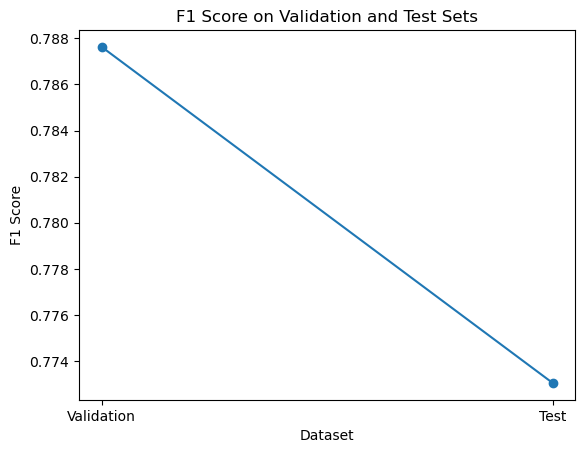

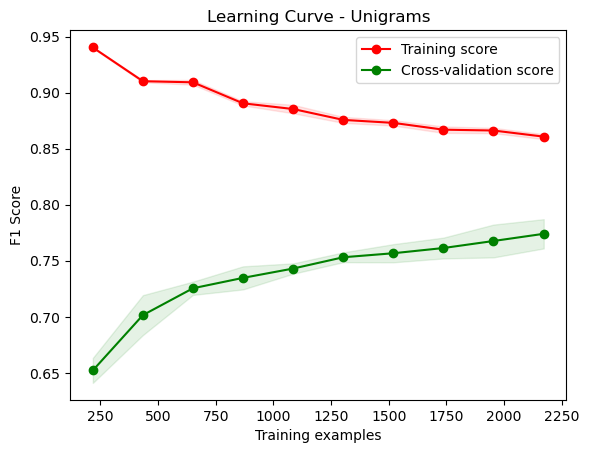

Best Parameters for Uni-Bigrams:  {'C': 0.001, 'degree': 2, 'kernel': 'linear'}
Best F1 Score for Uni-Bigrams:  0.7707397072937681

Classification Report for Uni-Bigrams (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.73      0.77      0.75       226
 Consult - History and Phy.       0.85      0.89      0.87       226
                 Orthopedic       0.80      0.85      0.82       226
                    Surgery       0.78      0.65      0.71       226

                   accuracy                           0.79       904
                  macro avg       0.79      0.79      0.79       904
               weighted avg       0.79      0.79      0.79       904


Classification Report for Uni-Bigrams (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.72      0.77      0.74       222
 Consult - History and Phy.       0.84      0.84      0.84       22

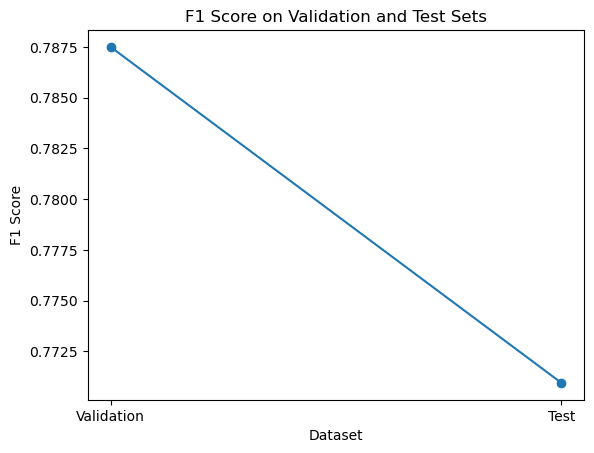

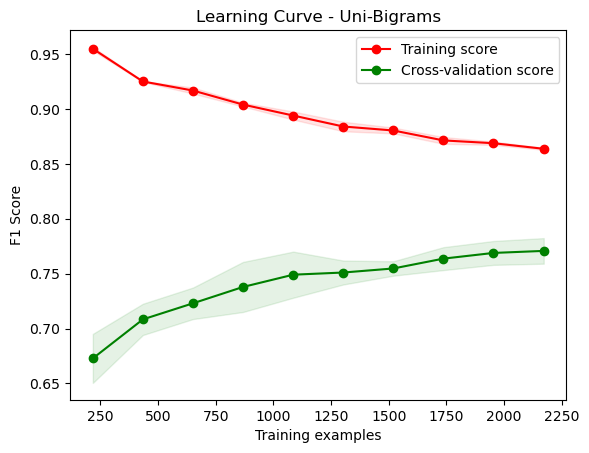

Best Parameters for TF-IDF:  {'C': 100, 'degree': 5, 'kernel': 'poly'}
Best F1 Score for TF-IDF:  0.6974354153164609

Classification Report for TF-IDF (Validation Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.68      0.62      0.65       226
 Consult - History and Phy.       0.79      0.89      0.84       226
                 Orthopedic       0.73      0.78      0.76       226
                    Surgery       0.66      0.58      0.62       226

                   accuracy                           0.72       904
                  macro avg       0.71      0.72      0.72       904
               weighted avg       0.71      0.72      0.72       904


Classification Report for TF-IDF (Test Set):
                             precision    recall  f1-score   support

 Cardiovascular / Pulmonary       0.71      0.63      0.66       222
 Consult - History and Phy.       0.76      0.86      0.81       222
                 Ortho

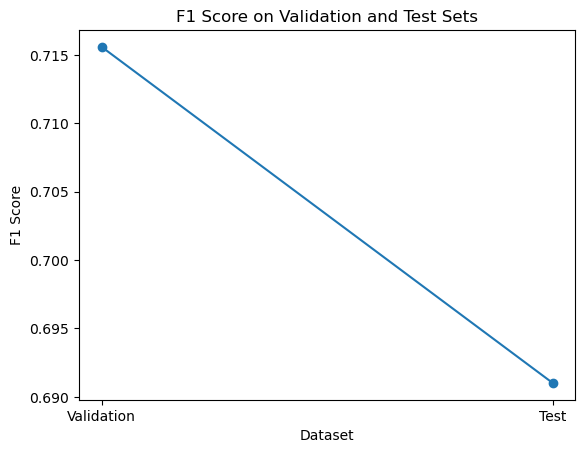

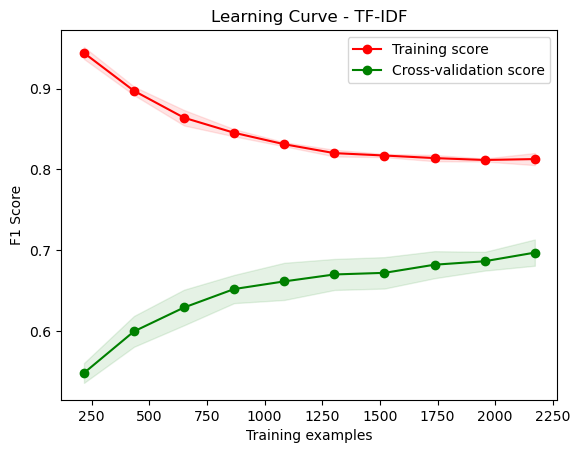

In [84]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

def grid_search_svm(X_train, y_train, X_val, y_val, X_test, y_test, text_representation):
    # Define the parameter grid for SVM
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'degree': [2, 3, 4, 5],
    }

    # Initialize SVM model
    model = SVC(class_weight='balanced', random_state=42)

    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

    # Perform grid search on the training set
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best Parameters for {text_representation}: ", grid_search.best_params_)
    print(f"Best F1 Score for {text_representation}: ", grid_search.best_score_)

    # Predictions on validation set
    y_val_pred = grid_search.predict(X_val)

    # Print classification report for validation set
    print(f"\nClassification Report for {text_representation} (Validation Set):")
    print(classification_report(y_val, y_val_pred))

    # Predictions on test set
    y_test_pred = grid_search.predict(X_test)

    # Print classification report for test set
    print(f"\nClassification Report for {text_representation} (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Plot the results on validation and test sets
    accuracy_val = grid_search.score(X_val, y_val)
    accuracy_test = grid_search.score(X_test, y_test)
    
    plt.plot(['Validation', 'Test'], [accuracy_val, accuracy_test], marker='o')
    plt.title('F1 Score on Validation and Test Sets')
    plt.xlabel('Dataset')
    plt.ylabel('F1 Score')
    plt.show()

    # Plot the learning curve
    plot_learning_curve(grid_search.best_estimator_, text_representation, X_train, y_train)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(f"Learning Curve - {title}")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1 Score")

    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# Perform grid search for each vectorized dataset
grid_search_svm(X_unigrams_train, y_unigrams_train, X_unigrams_val, y_unigrams_val, X_unigrams_test, y_unigrams_test, "Unigrams")
grid_search_svm(X_uni_bigrams_train, y_uni_bigrams_train, X_uni_bigrams_val, y_uni_bigrams_val, X_uni_bigrams_test, y_uni_bigrams_test, "Uni-Bigrams")
grid_search_svm(X_tfidf_train, y_tfidf_train, X_tfidf_val, y_tfidf_val, X_tfidf_test, y_tfidf_test, "TF-IDF")
